In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
def get_linear_layer(
    size,
    activation=None,
    use_time_distributed=False,
    use_bias=True
):
    """
    Returns a Keras Linear Layer
    Args:
        size: Output Size
        activation: Activation function to apply if required
        use_time_distributed: Whether to apply layer across time
        use_bias: Whether bias should be included in the layer
    """
    linear = tf.keras.layers.Dense(
        size, activation=activation, use_bias=use_bias
    )
    if(use_time_distributed):
        linear = tf.keras.layers.TimeDistributed(linear)
    return linear

[[-1.2238774  -2.5152962  -0.10162699 -0.6814066  -0.77941203]
 [ 3.6732345  -2.0550869   2.3865108   0.31085777  1.7663065 ]]


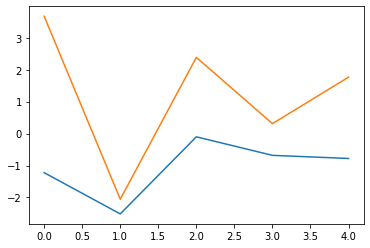

In [3]:
# A vanilla linear layer
rank_1_tensor = tf.constant([[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]])
linear_layer = get_linear_layer(5)
print(linear_layer)
output = linear_layer(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0])
plt.plot(output.numpy()[1])

[[0.16768783 6.6861205  2.9950352  0.         2.8276193 ]
 [1.1625292  1.517914   1.4914309  5.1015463  0.35785794]]


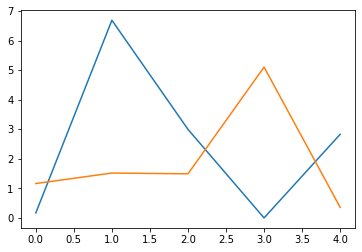

In [4]:
# A ReLU activated lineaar layer function
activation = tf.keras.layers.Activation('relu')
activated_ll = get_linear_layer(5, activation=activation)
print(activated_ll)
output = activated_ll(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0])
plt.plot(output.numpy()[1])

[[[1.827421   0.         0.         3.5054865  6.1785355 ]
  [0.18982196 0.         0.         0.         0.94396776]]]


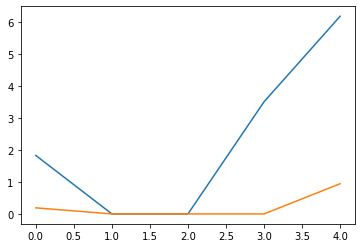

In [5]:
rank_1_tensor = tf.constant([[[0.0, 1.0, 2.0, 3.0, 4.0, 5.0], [5.0, 4.0, 3.0, 2.0, 1.0, 0.0]]])

td_activated_ll = get_linear_layer(5, activation=activation, use_time_distributed=True)
print(td_activated_ll)
output = td_activated_ll(rank_1_tensor)
print(output.numpy())
plt.plot(output.numpy()[0][0])
plt.plot(output.numpy()[0][1])